In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

In [8]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field=850
magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="MG50/correlationFUNCTfolderNH/"
output_name="MG2_50SDS.out"
residues=22


author_name="Ricky Nencini"

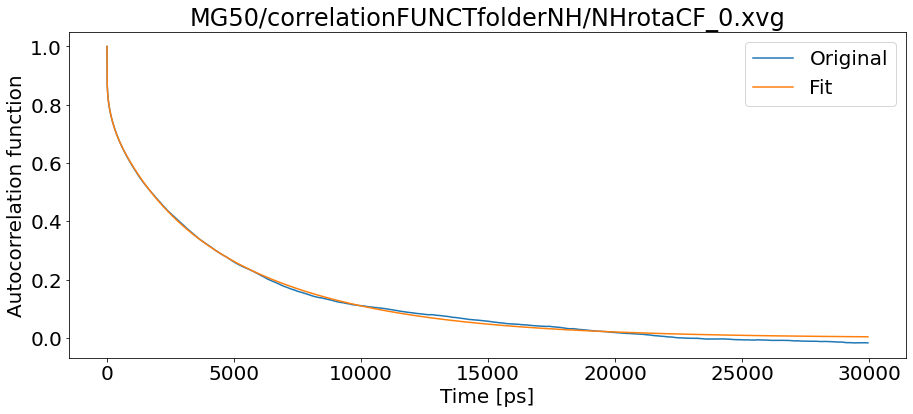

T1: 0.7431813130814772 T2: 0.1341476288324631 NOE: 0.6108878314312549


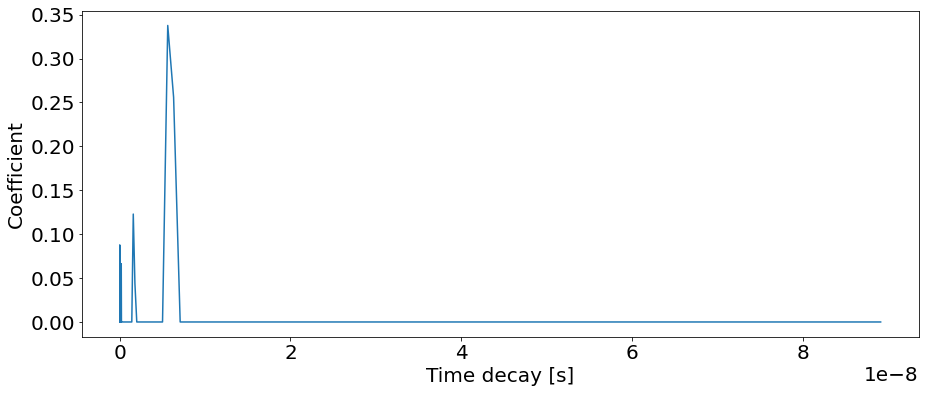

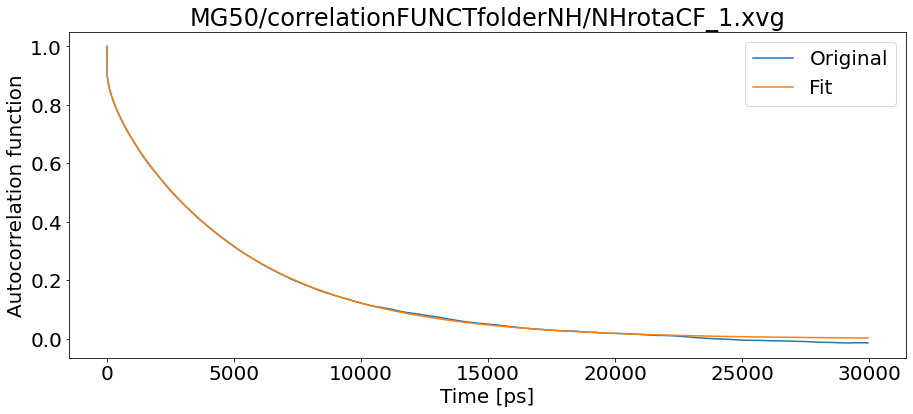

T1: 0.7286395221494623 T2: 0.11911857864398553 NOE: 0.7170955253334066


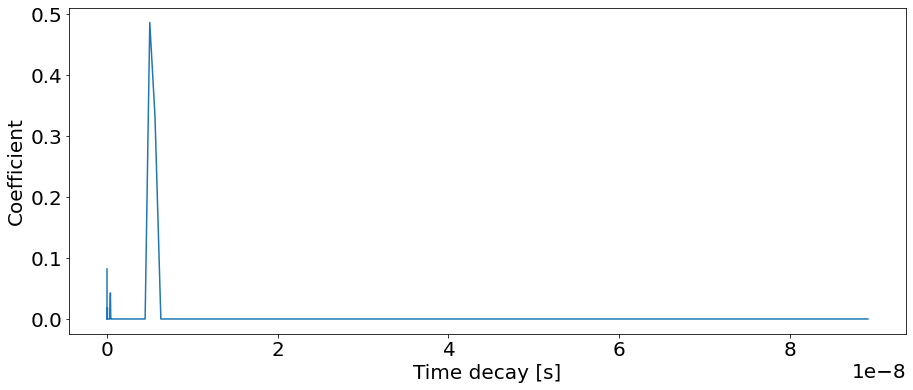

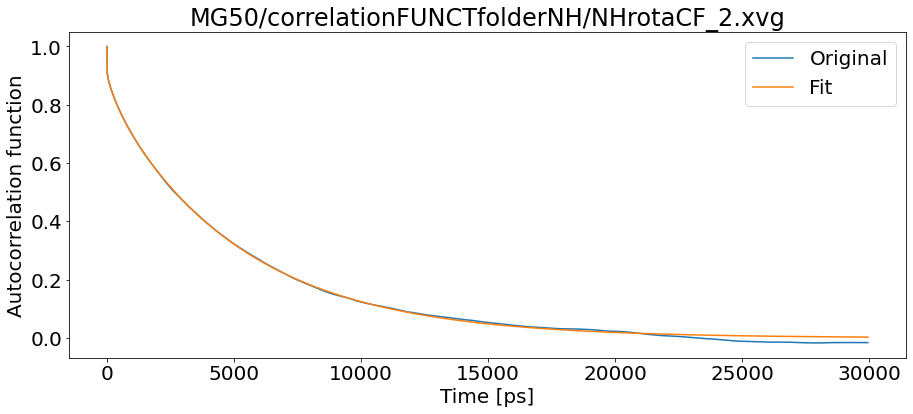

T1: 0.7123644228421174 T2: 0.11678960573396761 NOE: 0.7379330991106074


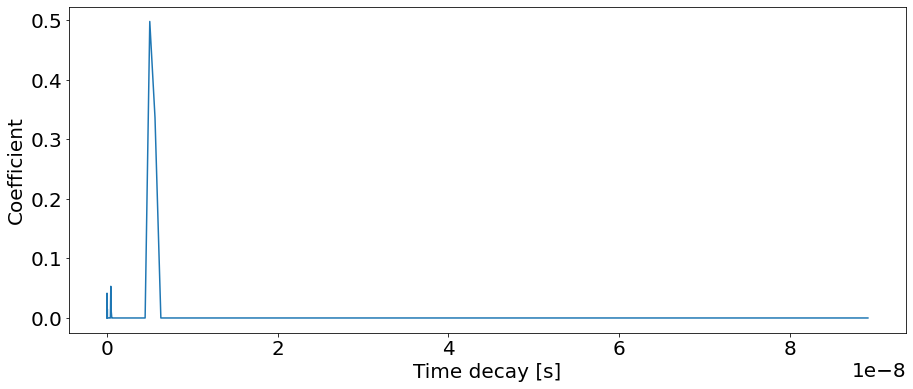

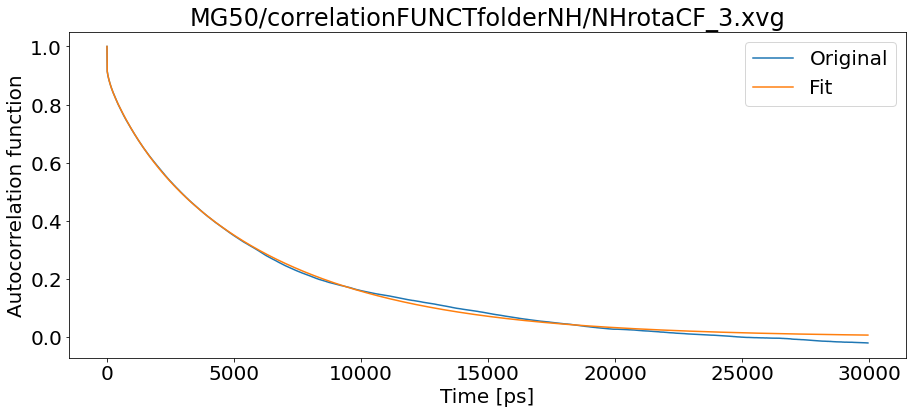

T1: 0.7447637922459543 T2: 0.10436059173907207 NOE: 0.7465535385530786


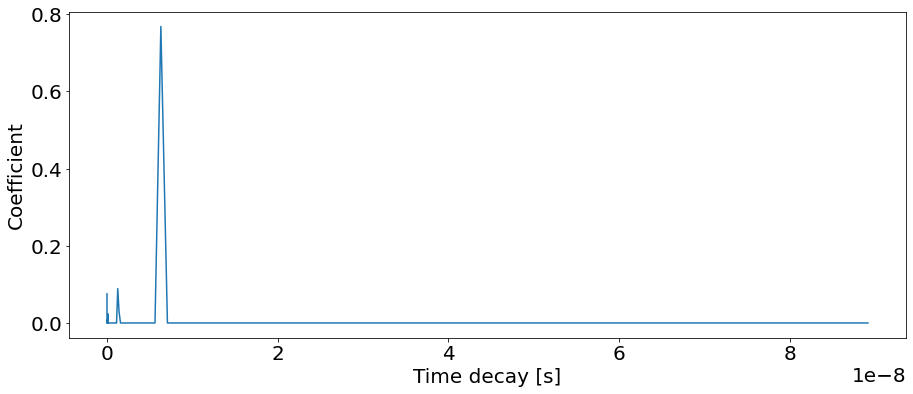

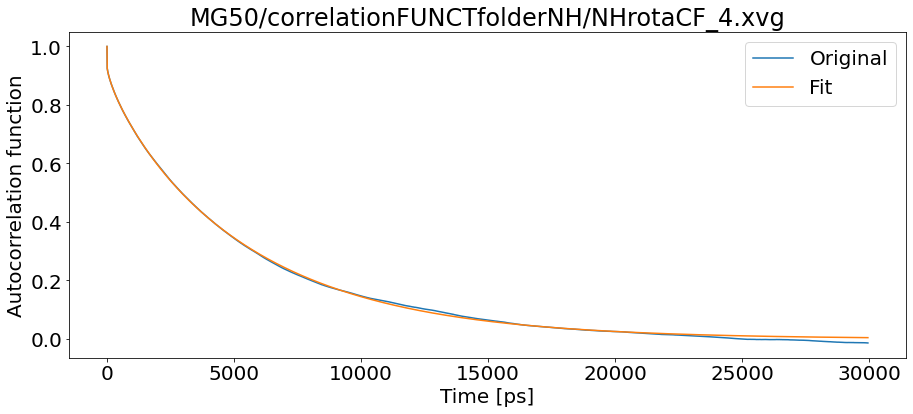

T1: 0.7175353668675164 T2: 0.10765585120346785 NOE: 0.7496721877427219


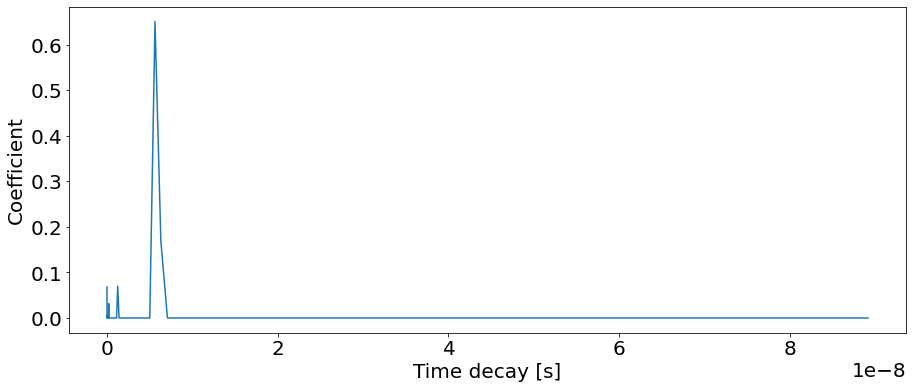

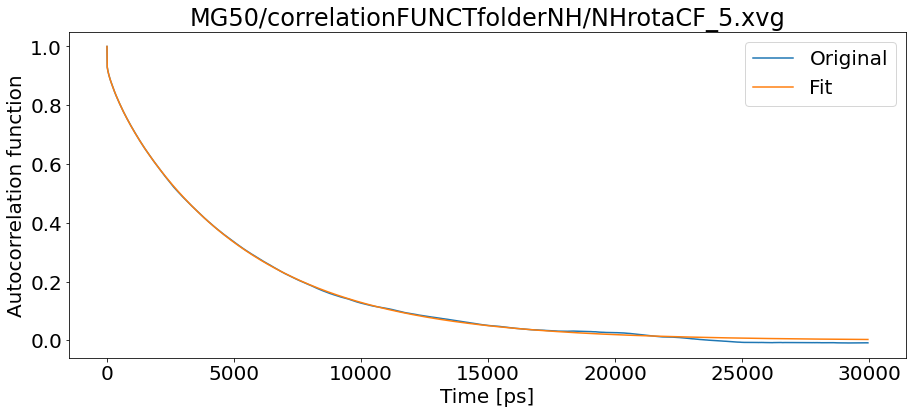

T1: 0.6936551611667237 T2: 0.11288060477607022 NOE: 0.7558731590357075


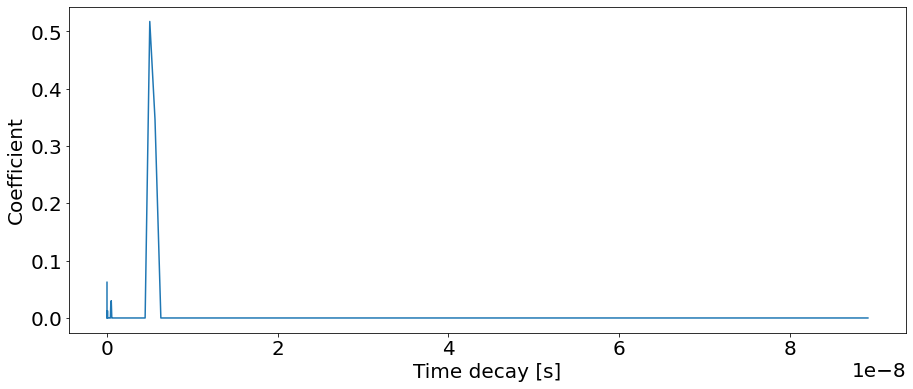

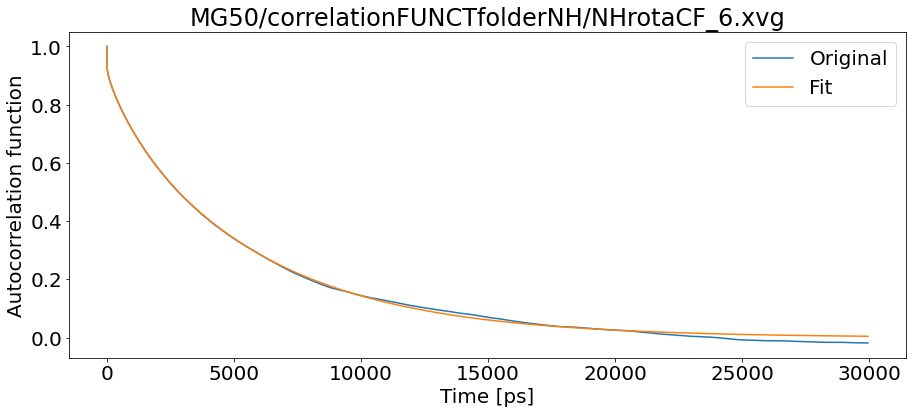

T1: 0.7207290314873069 T2: 0.10887128518622549 NOE: 0.7531608678282914


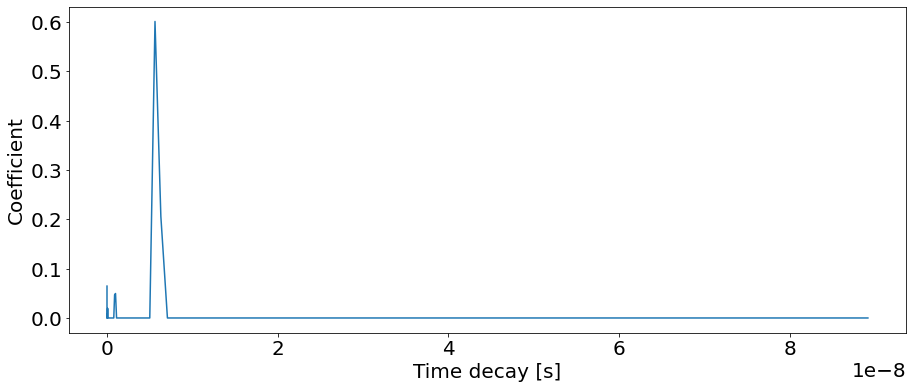

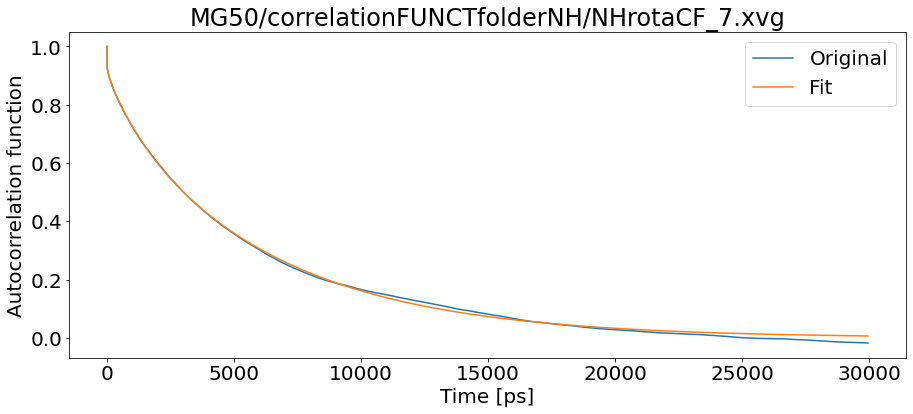

T1: 0.7380128450678554 T2: 0.10201000964580235 NOE: 0.7570868925406873


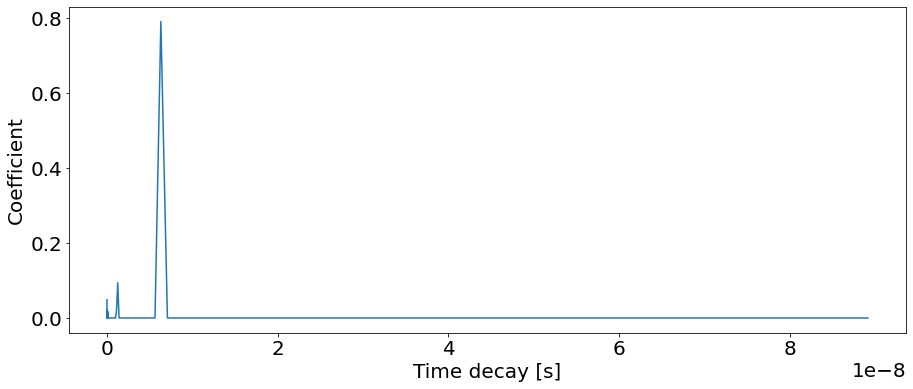

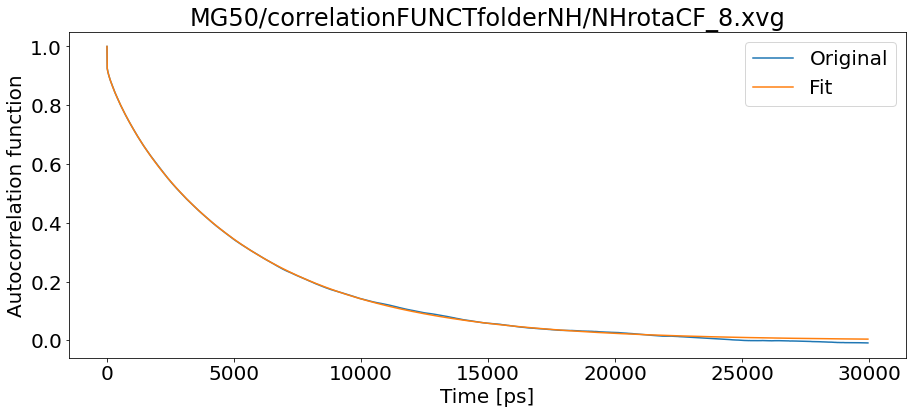

T1: 0.7119595078588192 T2: 0.10887028977176076 NOE: 0.7663330827426991


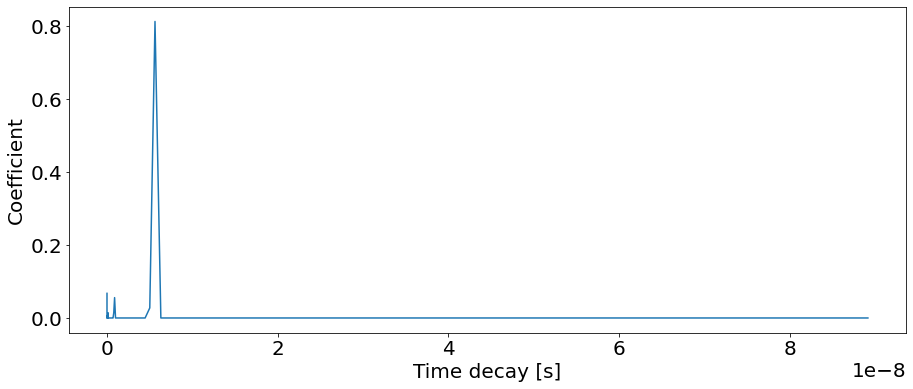

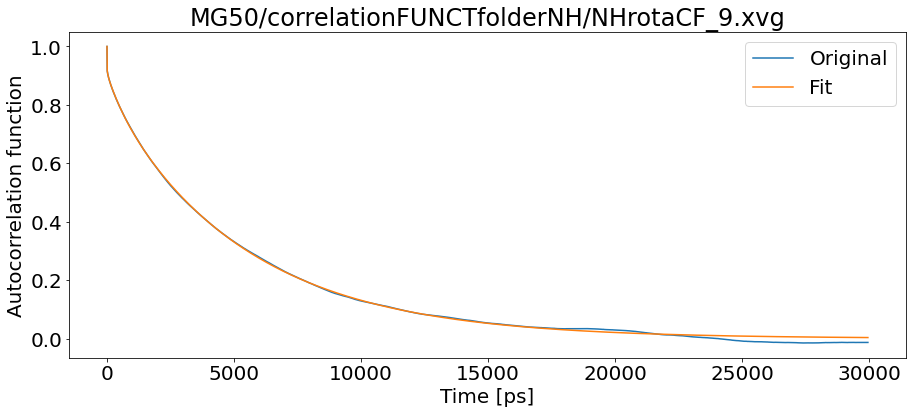

T1: 0.7087115276723167 T2: 0.11347064938229337 NOE: 0.7565458349402439


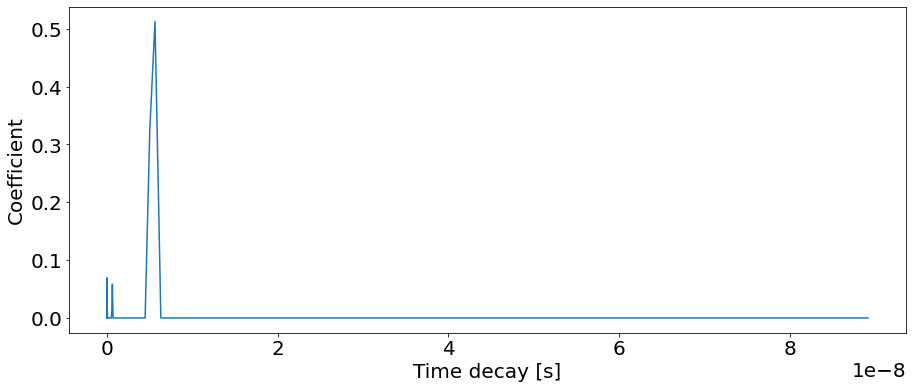

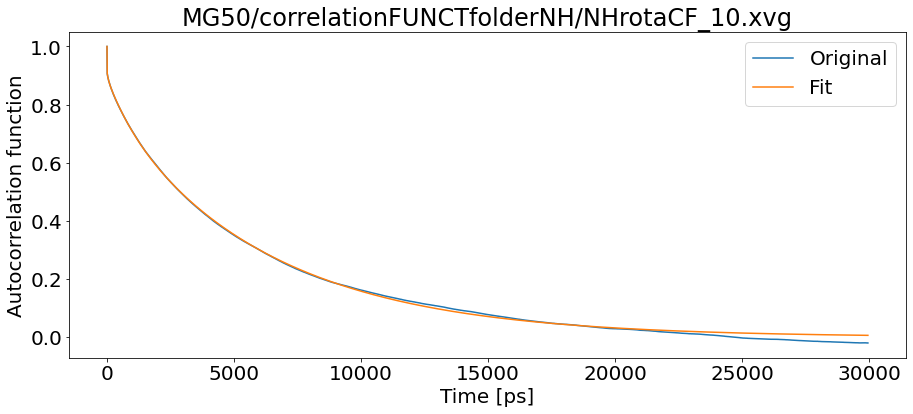

T1: 0.7632116616138486 T2: 0.10447680735867926 NOE: 0.7527663773768365


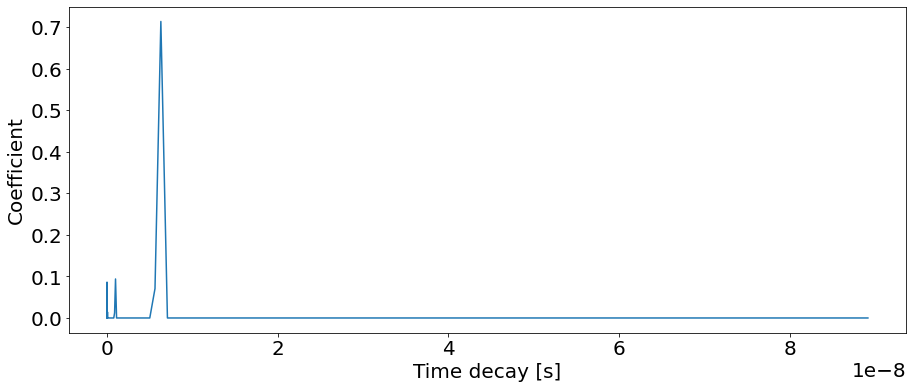

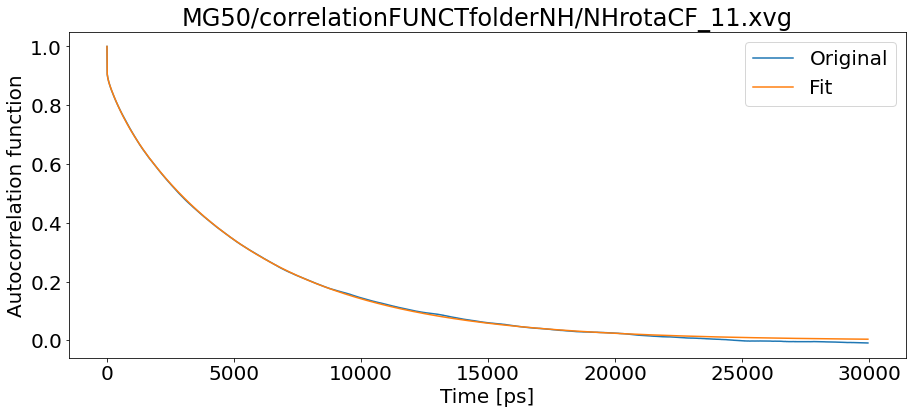

T1: 0.7486494120400101 T2: 0.11005409581743139 NOE: 0.7497917791929749


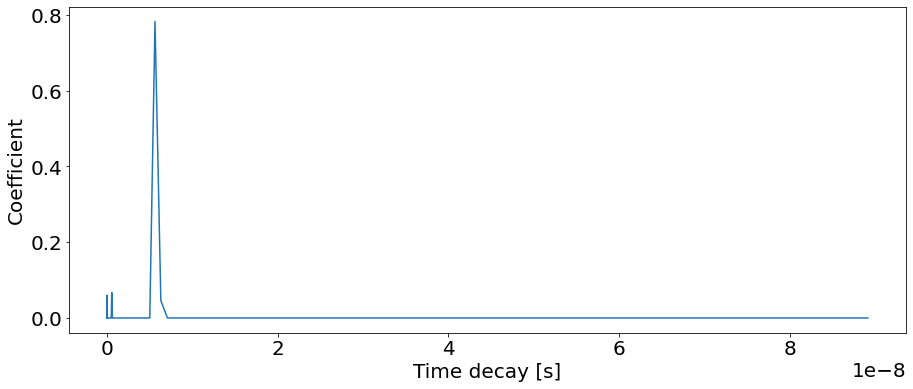

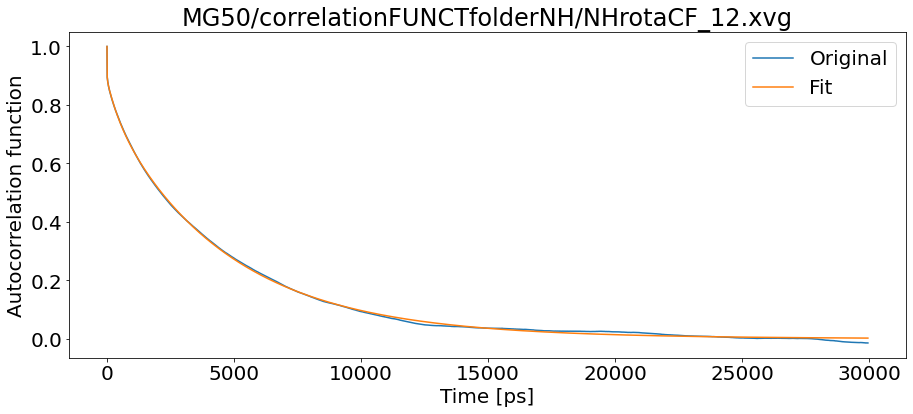

T1: 0.6686085463415282 T2: 0.13151187983205856 NOE: 0.7083516989235022


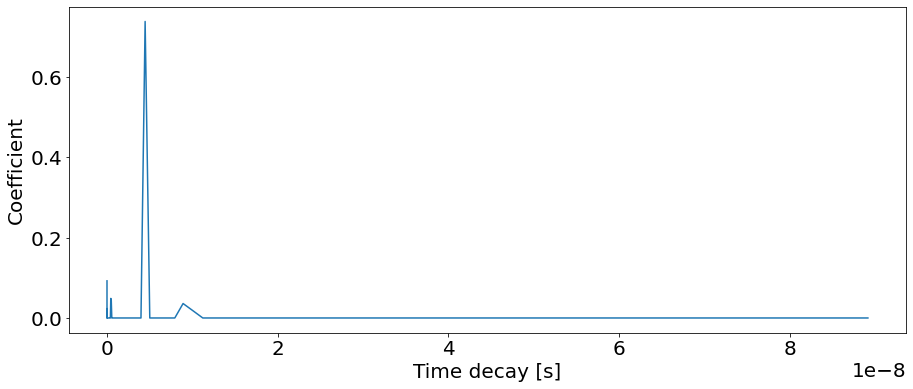

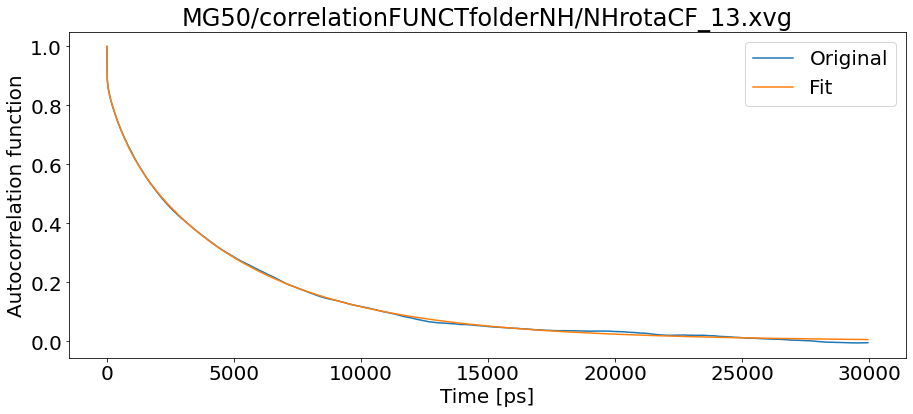

T1: 0.713654621101824 T2: 0.1233812299748699 NOE: 0.6796390920762895


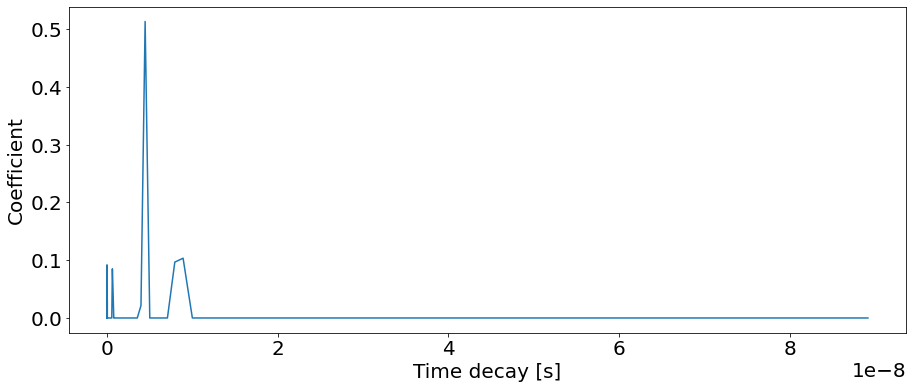

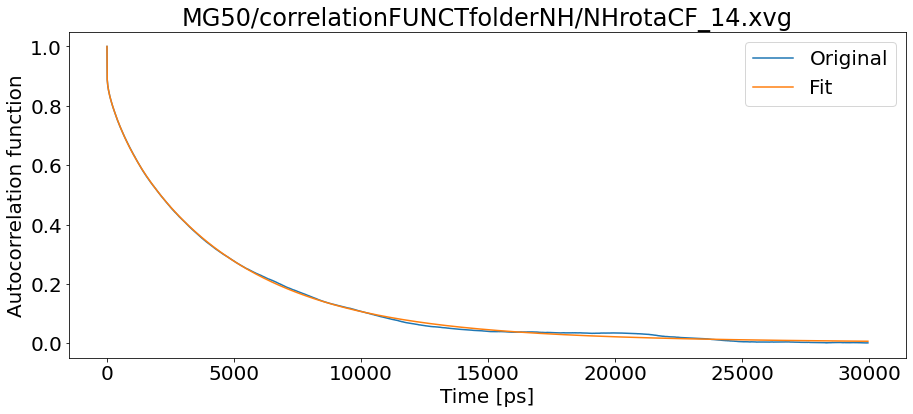

T1: 0.6891289072874583 T2: 0.12608673057968714 NOE: 0.7084731025139819


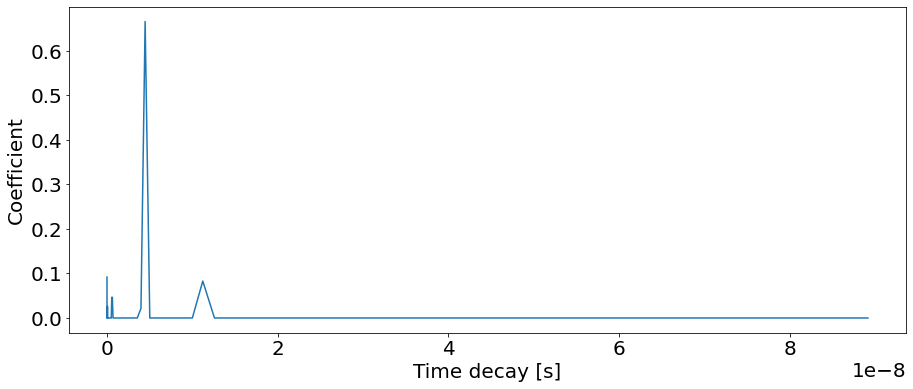

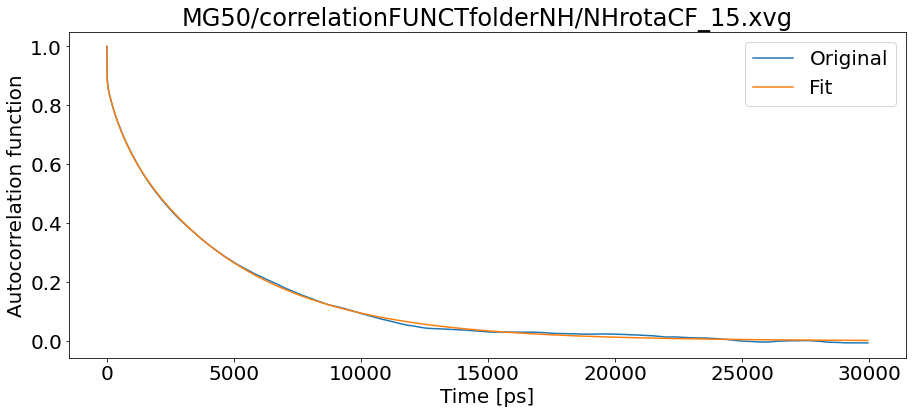

T1: 0.6845059722605619 T2: 0.13550979935501697 NOE: 0.6837111005219194


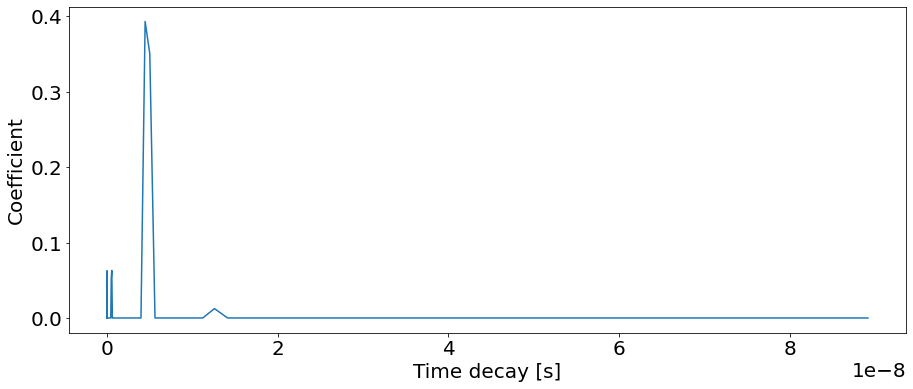

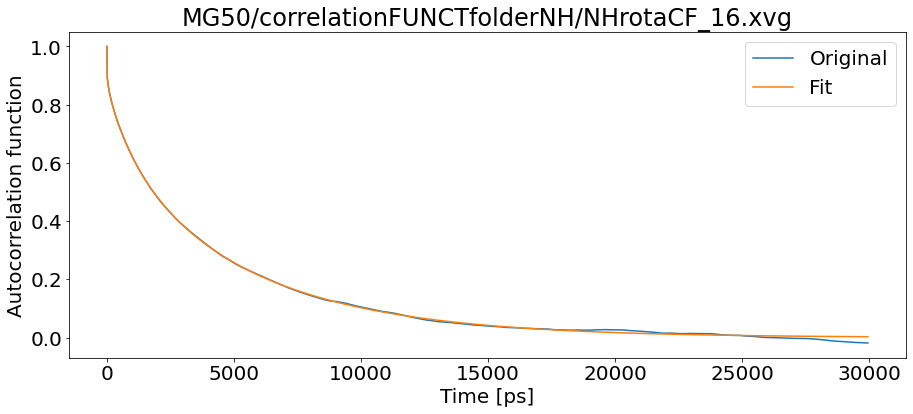

T1: 0.6643208729489803 T2: 0.1344656471039939 NOE: 0.6757506069671781


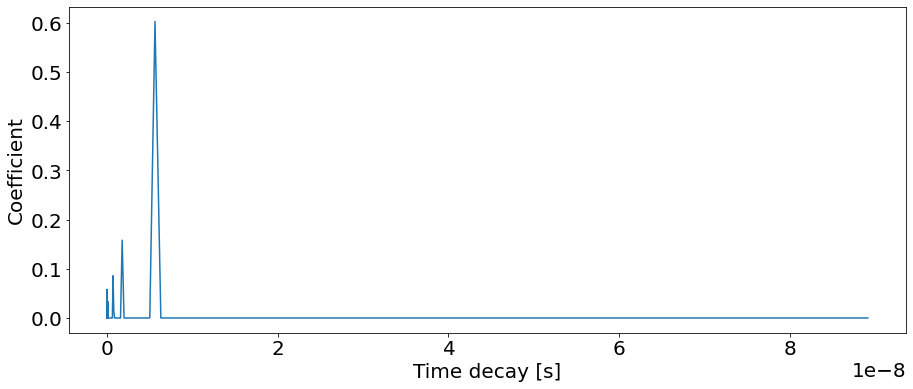

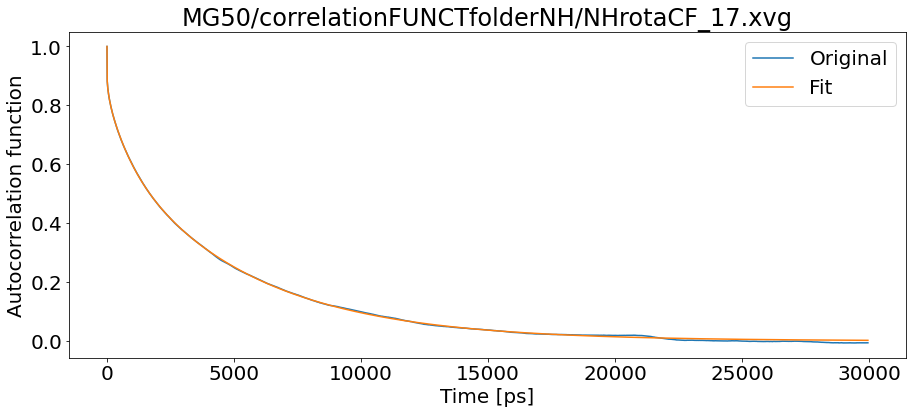

T1: 0.6981234261618774 T2: 0.14116484054524214 NOE: 0.6439832197124219


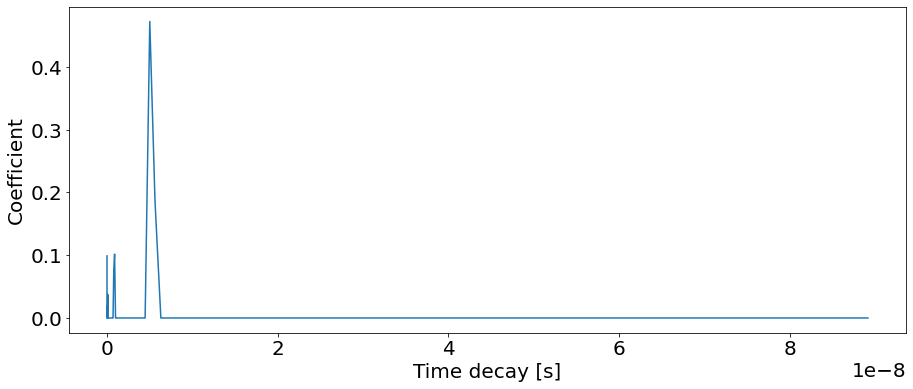

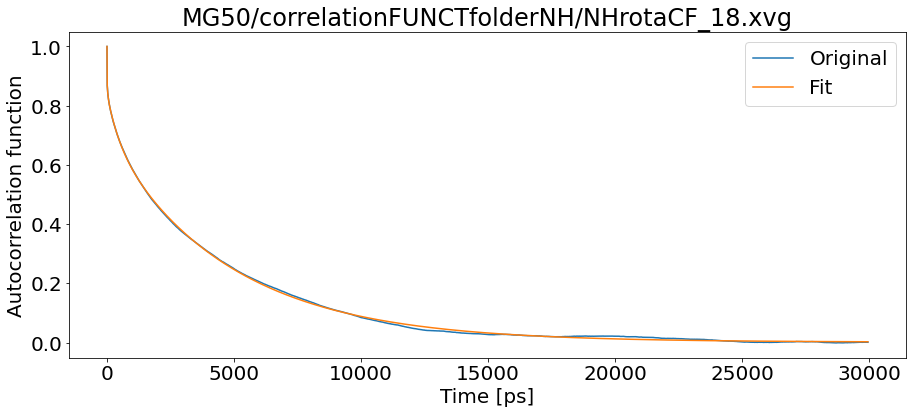

T1: 0.7192246749581244 T2: 0.14130075963028554 NOE: 0.6135061208654602


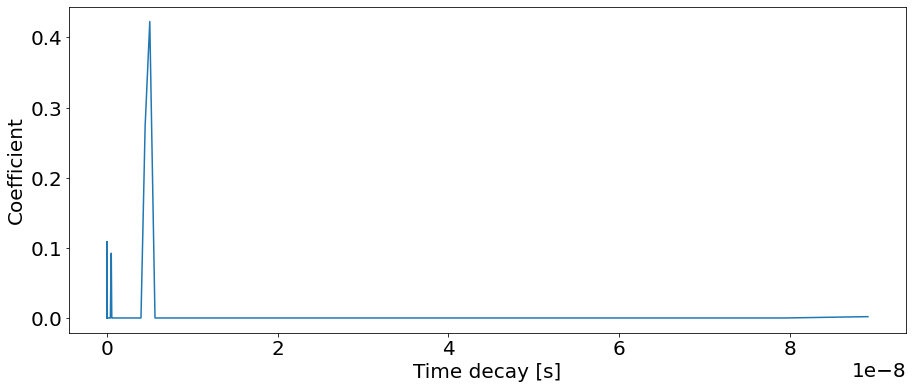

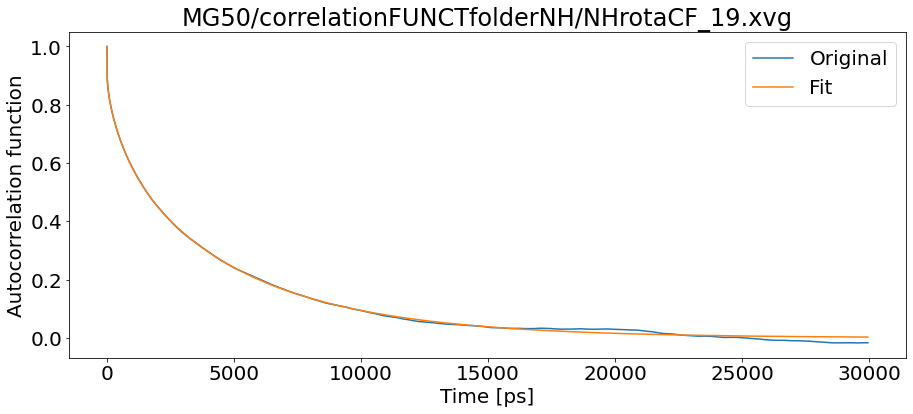

T1: 0.6873121098204698 T2: 0.14335405753055844 NOE: 0.6042438472189011


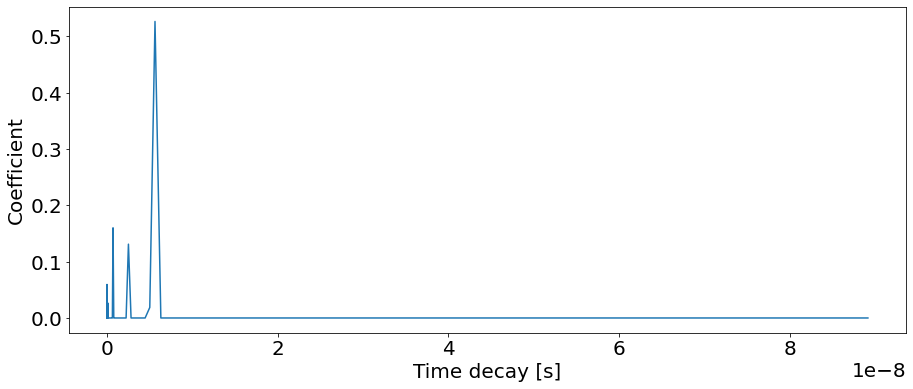

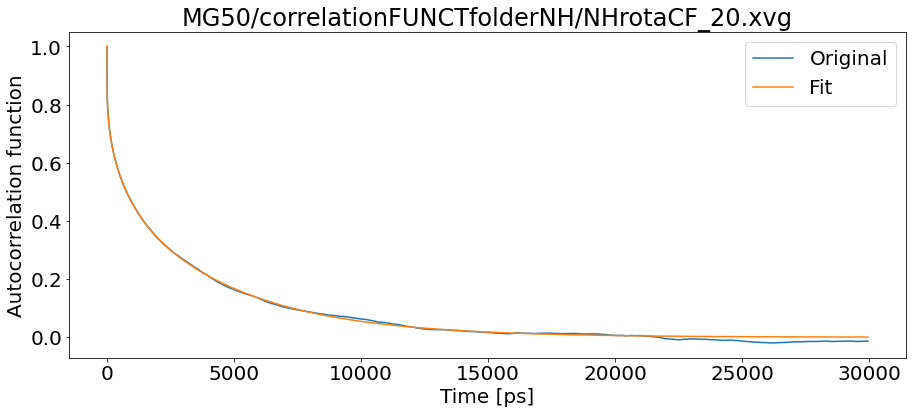

T1: 0.7397385042321886 T2: 0.19758212075776613 NOE: 0.45406517142766945


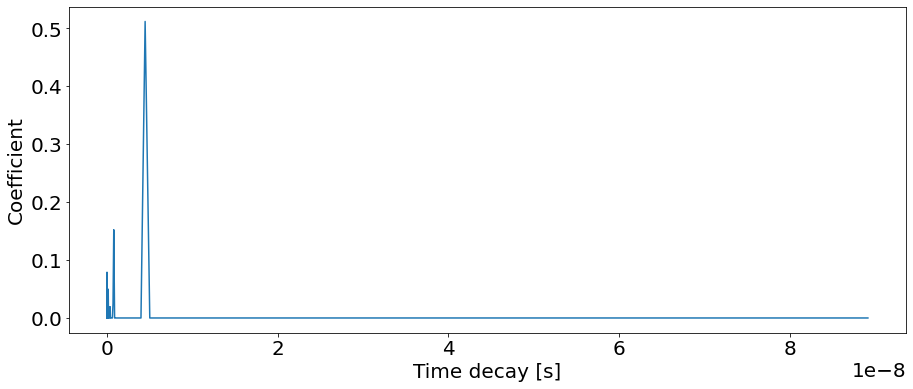

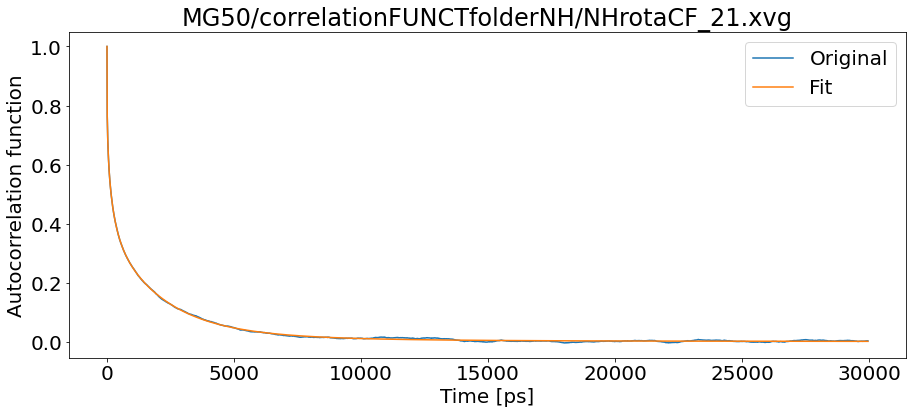

T1: 0.8008195568942154 T2: 0.3250627116237139 NOE: 0.09124157683207867


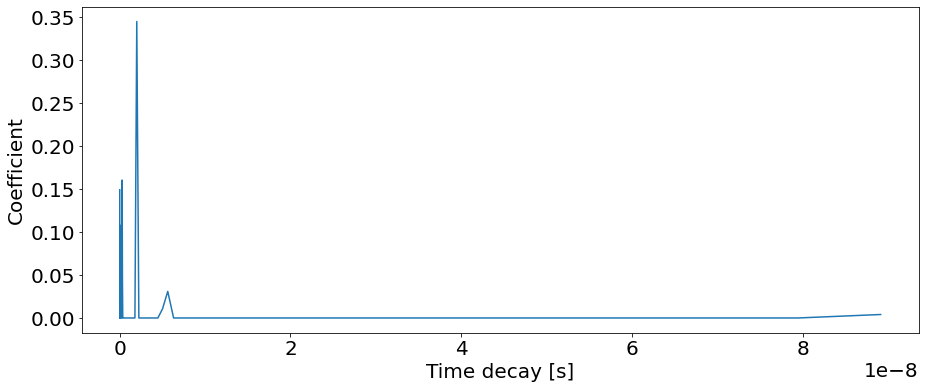

In [9]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    
#np.savetxt(output_name,Ctimes_to_save)

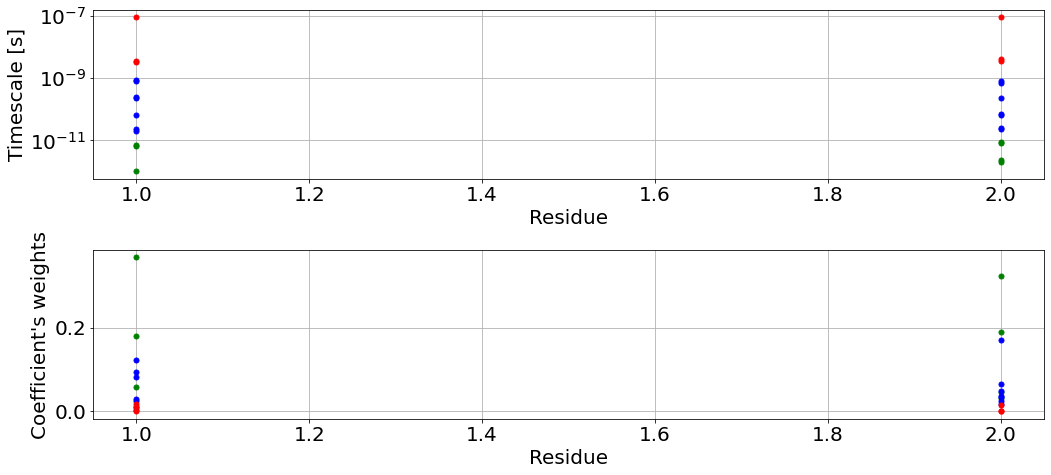

In [8]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [9]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="/home/nenciric/Documents/git/CorysPeptides/figure1/water_correlation_functions/OPC/"
output_name="60SDS_micelle_SDS_relax_alpha.out"
residues=2


author_name="Ricky Nencini"




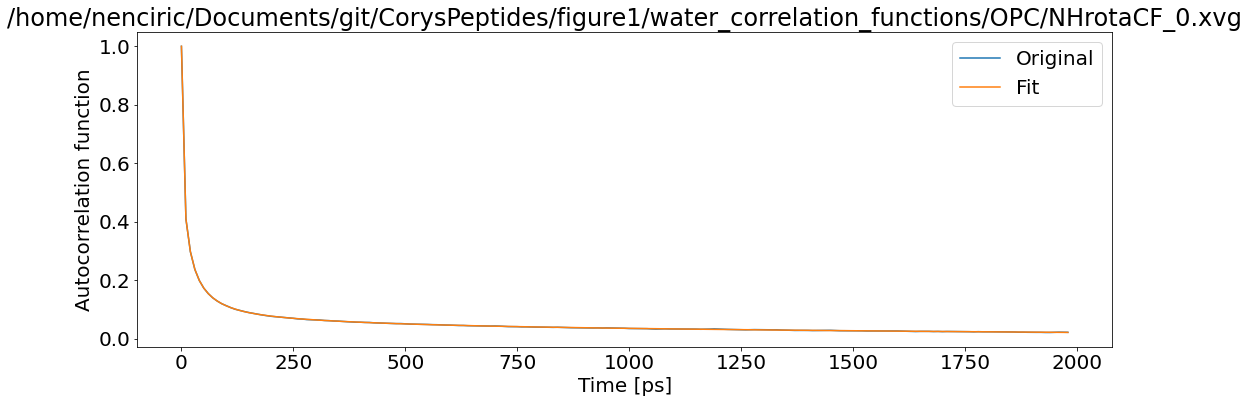

T1: 0.018862172103752264 T2: 0.01768723275803335 NOE: 0


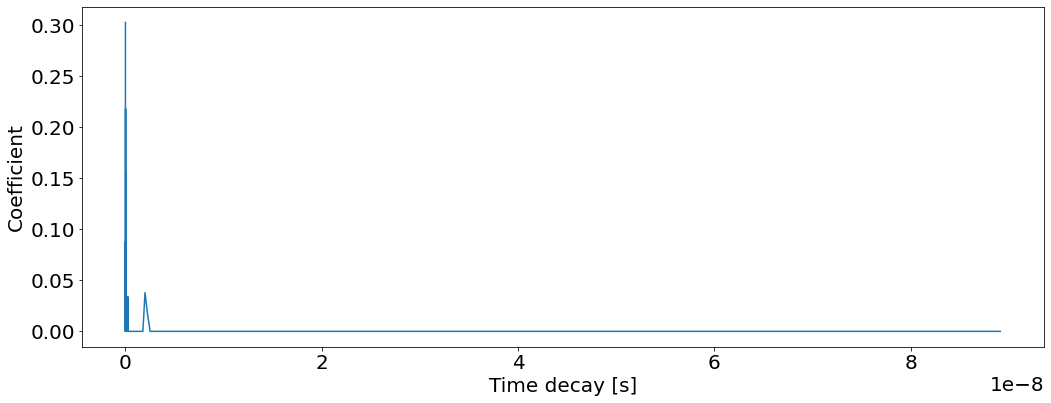

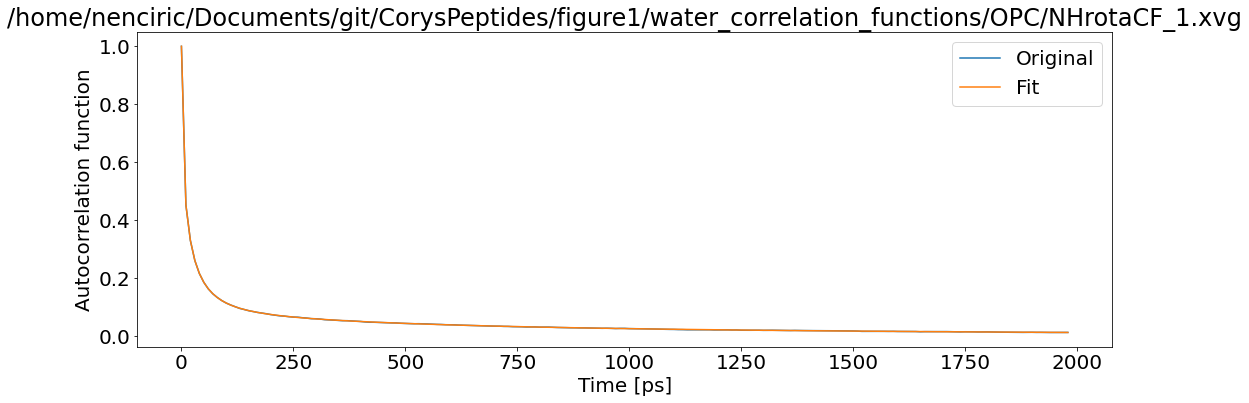

T1: 0.024312122146161606 T2: 0.023482040600615203 NOE: 0


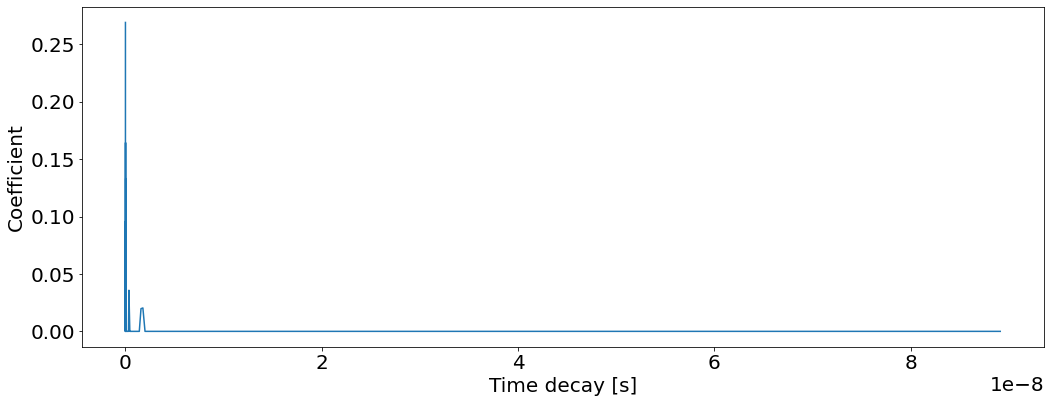

In [10]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

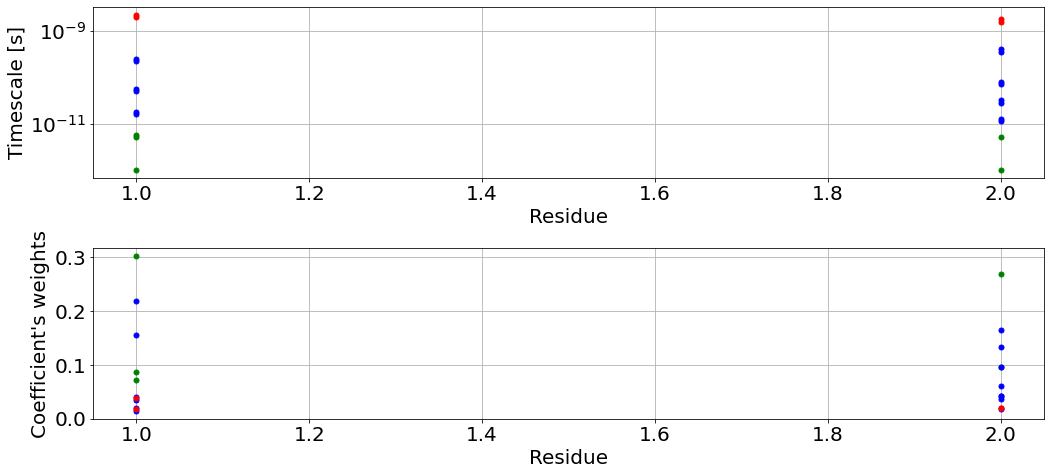

In [11]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [16]:
np.savetxt("50SDS_eYqjD_relax_coef.out",Ctimes_to_save)

In [17]:
pwd

'/home/local/nenciric/Documents/git/CorysPeptides/calculate_relax_from_SDS_proteins'